In [1]:
!pip install PIL
!pip install scipy
!pip install scikit_posthocs

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 19.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import scikit_posthocs as sp  #スティール・ドゥワス検定に使用
from scipy import stats #シャピロ・ウィクス検定に使用(正規分布に従っているか確認)
from PIL import Image #画像を挿入する際に使用
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
from sklearn.linear_model import LinearRegression #線形回帰を行う際に使用
import seaborn as sns

data = pd.read_csv('/Users/shimizushota/python/StudentsPerformance.csv')
data.info()
print(data.describe()) #Rのsummaryと似ている
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000  

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


math mean = 66.089
reading mean = 69.169
writing mean = 68.054
math median = 66.0
reading median = 70.0
writing median = 69.0
math max = 100
reading max = 100
writing max = 100
math min = 0
reading min = 17
writing min = 10
math sd = 15.155496659628149
reading sd = 14.592890015346516
writing sd = 15.188057281956768
math var = 229.68907899999996
reading var = 212.95243900000003
writing var = 230.677084


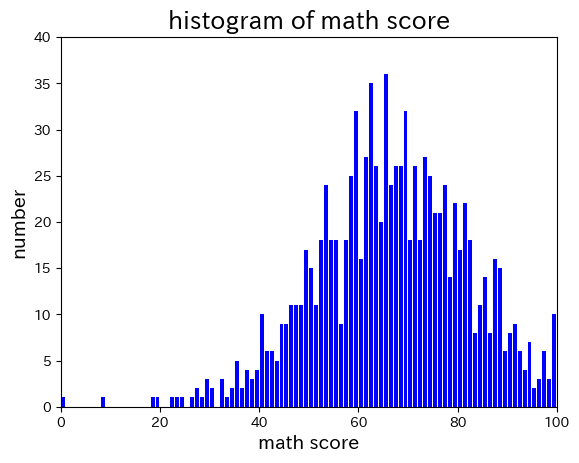

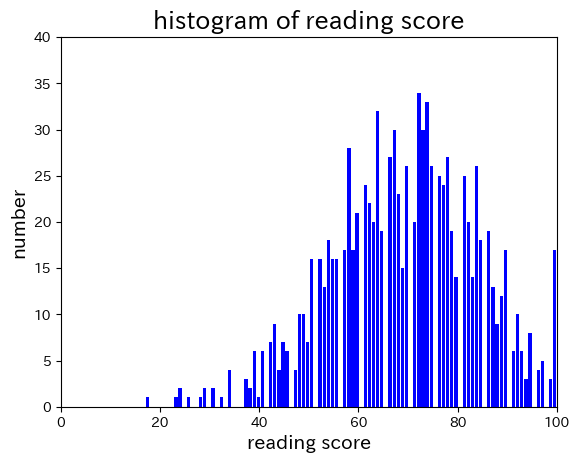

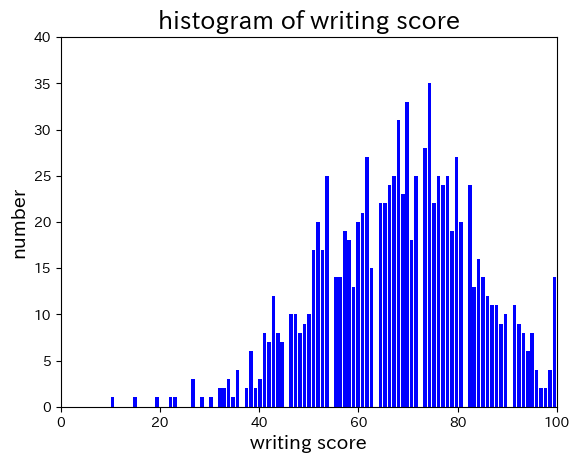

In [4]:
#基本統計分析
# 平均値
print(f'math mean = {data['math score'].mean()}')
print(f'reading mean = {data['reading score'].mean()}')
print(f'writing mean = {data['writing score'].mean()}')

#中央値
print(f'math median = {data['math score'].median()}')
print(f'reading median = {data['reading score'].median()}')
print(f'writing median = {data['writing score'].median()}')

#最高点
print(f'math max = {data['math score'].max()}')
print(f'reading max = {data['reading score'].max()}')
print(f'writing max = {data['writing score'].max()}')

#最低点
print(f'math min = {data['math score'].min()}')
print(f'reading min = {data['reading score'].min()}')
print(f'writing min = {data['writing score'].min()}')

#標準偏差
print(f'math sd = {np.std(data['math score'])}')
print(f'reading sd = {np.std(data['reading score'])}')
print(f'writing sd = {np.std(data['writing score'])}')

#分散
print(f'math var = {np.var(data['math score'])}')
print(f'reading var = {np.var(data['reading score'])}')
print(f'writing var = {np.var(data['writing score'])}')

#数学のヒストグラム
plt.xlim(0,100)
plt.ylim(0,40)
plt.title('histogram of math score', fontsize = 18)
plt.xlabel('math score', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.hist(data['math score'], bins = 100, rwidth = 0.8 ,color = 'b')
plt.show()

#readingのヒストグラム
plt.xlim(0,100)
plt.ylim(0,40)
plt.title('histogram of reading score', fontsize = 18)
plt.xlabel('reading score', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.hist(data['reading score'], bins = 100, rwidth = 0.8 ,color = 'b')
plt.show()

#writingのヒストグラム
plt.xlim(0,100)
plt.ylim(0,40)
plt.title('histogram of writing score', fontsize = 18)
plt.xlabel('writing score', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.hist(data['writing score'], bins = 100, rwidth = 0.8 ,color = 'b')
plt.show()

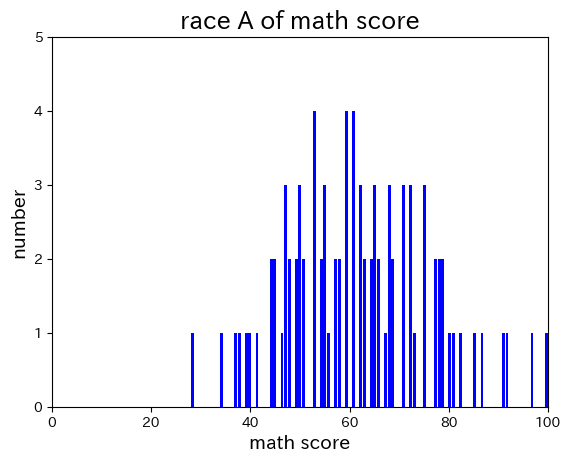

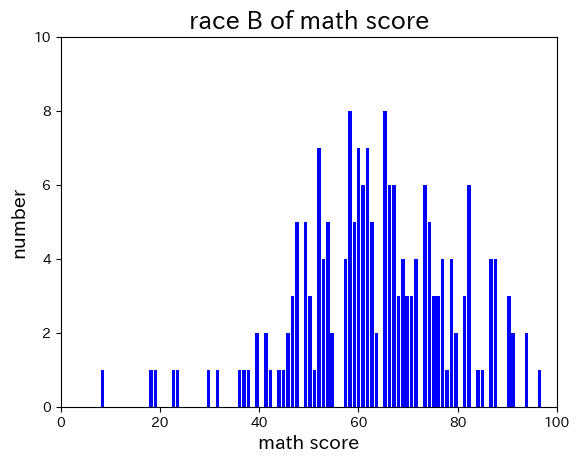

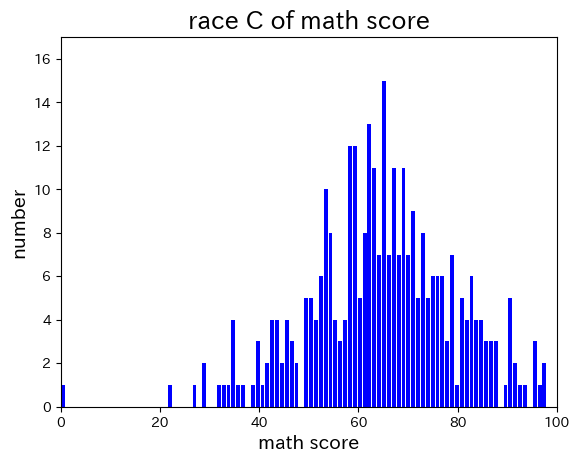

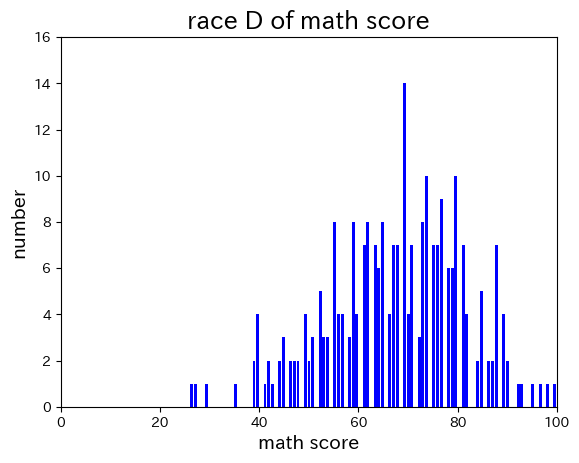

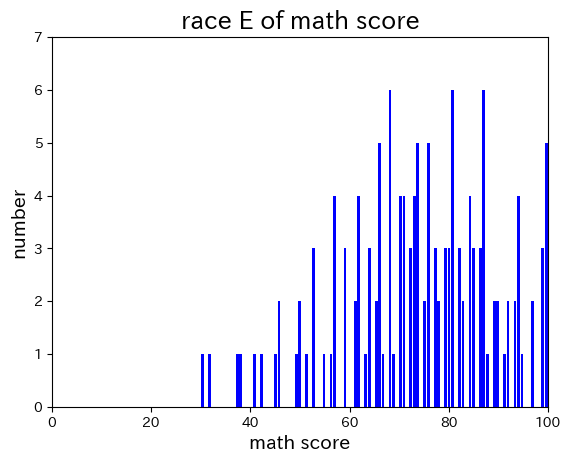

ShapiroResult(statistic=np.float64(0.9917360440600246), pvalue=np.float64(0.8545319451007576))
ShapiroResult(statistic=np.float64(0.9909481406292049), pvalue=np.float64(0.8038195479730464))
ShapiroResult(statistic=np.float64(0.9881641456684203), pvalue=np.float64(0.6042127776865223))
ShapiroResult(statistic=np.float64(0.9808056990812751), pvalue=np.float64(0.010389426534437658))
ShapiroResult(statistic=np.float64(0.9855941806528611), pvalue=np.float64(0.04912542237846748))
ShapiroResult(statistic=np.float64(0.9826837378992016), pvalue=np.float64(0.018961697623682598))
              A             B             C         D             E
A  1.000000e+00  6.569791e-01  3.098548e-01  0.003500  7.541489e-08
B  6.569791e-01  1.000000e+00  9.698695e-01  0.043237  5.129116e-08
C  3.098548e-01  9.698695e-01  1.000000e+00  0.072684  1.313152e-08
D  3.500131e-03  4.323666e-02  7.268380e-02  1.000000  2.059462e-04
E  7.541489e-08  5.129116e-08  1.313152e-08  0.000206  1.000000e+00
          A      

In [5]:
#民族と成績の関係
#民族ごとにデータをまとめる
dataA = data[data['race/ethnicity'] == 'group A']
dataB = data[data['race/ethnicity'] == 'group B']
dataC = data[data['race/ethnicity'] == 'group C']
dataD = data[data['race/ethnicity'] == 'group D']
dataE = data[data['race/ethnicity'] == 'group E']

#民族A　数学のヒストグラム
plt.xlim(0,100)
plt.ylim(0,5)
plt.title('race A of math score', fontsize = 18)
plt.xlabel('math score', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.hist(dataA['math score'], bins = 100, rwidth = 0.8 ,color = 'b')
plt.show()

#民族B　数学のヒストグラム
plt.xlim(0,100)
plt.ylim(0,10)
plt.title('race B of math score', fontsize = 18)
plt.xlabel('math score', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.hist(dataB['math score'], bins = 100, rwidth = 0.8 ,color = 'b')
plt.show()

#民族C　数学のヒストグラム
plt.xlim(0,100)
plt.ylim(0,17)
plt.title('race C of math score', fontsize = 18)
plt.xlabel('math score', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.hist(dataC['math score'], bins = 100, rwidth = 0.8 ,color = 'b')
plt.show()

#民族D　数学のヒストグラム
plt.xlim(0,100)
plt.ylim(0,16)
plt.title('race D of math score', fontsize = 18)
plt.xlabel('math score', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.hist(dataD['math score'], bins = 100, rwidth = 0.8 ,color = 'b')
plt.show()

#民族E　数学のヒストグラム
plt.xlim(0,100)
plt.ylim(0,7)
plt.title('race E of math score', fontsize = 18)
plt.xlabel('math score', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.hist(dataE['math score'], bins = 100, rwidth = 0.8 ,color = 'b')
plt.show()

#正規分布に従っているかを調べる　シャピロ・ウィルク検定（今回は95%信頼区間で行ったので p < 0.05だったら棄却され正規分布に従っていないことになる）
#グループAは正規分布に従っていることが分かった
Am = stats.shapiro(dataA['math score'])
Ar = stats.shapiro(dataA['reading score'])
Aw = stats.shapiro(dataA['writing score'])
print(Am)
print(Ar)
print(Aw)

#グループBは正規分布に従っていないことが分かった
Bm = stats.shapiro(dataB['math score'])
Br = stats.shapiro(dataB['reading score'])
Bw = stats.shapiro(dataB['writing score'])
print(Bm)
print(Br)
print(Bw)

#スティール・ドゥワスの多重比較検定　民族間で数学の成績に差があるのか調べる A-D,A-E,B-D,B-E,C-E,D-Eで有意差あり
math_compare = pd.DataFrame({'A':dataA['math score'], 'B': dataB['math score'], 'C': dataC['math score']
                             , 'D': dataD['math score'], 'E': dataE['math score']})
math_compare = math_compare.melt(var_name='groups', value_name='values')
print(sp.posthoc_dscf(math_compare, val_col='values', group_col='groups'))

#スティール・ドゥワスの多重比較検定　民族間でreadingの成績に差があるのか調べる A-D,A-E,B-E,C-E,D-Eで有意差あり
reading_compare = pd.DataFrame({'A':dataA['reading score'], 'B': dataB['reading score'], 'C': dataC['reading score']
                             , 'D': dataD['reading score'], 'E': dataE['reading score']})
reading_compare = reading_compare.melt(var_name='groups', value_name='values')
print(sp.posthoc_dscf(reading_compare, val_col='values', group_col='groups'))

#スティール・ドゥワスの多重比較検定　民族間でwritingの成績に差があるのか調べる A-C,A-D,A-E,B-D,B-Eで有意差あり
writing_compare = pd.DataFrame({'A':dataA['writing score'], 'B': dataB['writing score'], 'C': dataC['writing score']
                             , 'D': dataD['writing score'], 'E': dataE['writing score']})
writing_compare = writing_compare.melt(var_name='groups', value_name='values')
print(sp.posthoc_dscf(writing_compare, val_col='values', group_col='groups'))

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64


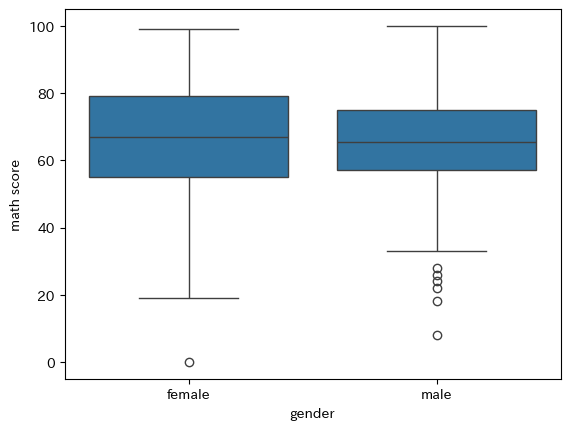

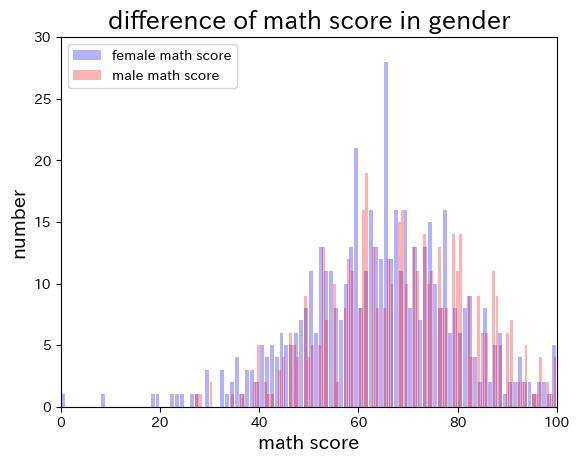

ShapiroResult(statistic=np.float64(0.9911773367235313), pvalue=np.float64(0.003509809445485069))
ShapiroResult(statistic=np.float64(0.985496651428148), pvalue=np.float64(4.957654317136303e-05))
ShapiroResult(statistic=np.float64(0.9792476528450611), pvalue=np.float64(9.908961375396949e-07))
ShapiroResult(statistic=np.float64(0.9935648775263688), pvalue=np.float64(0.03801760848161378))
ShapiroResult(statistic=np.float64(0.9946232523317924), pvalue=np.float64(0.0896451871090999))
ShapiroResult(statistic=np.float64(0.9948080618914475), pvalue=np.float64(0.10401446152420847))
MannwhitneyuResult(statistic=np.float64(101768.5), pvalue=np.float64(4.2790767734787687e-07))
BartlettResult(statistic=np.float64(0.9209040845298054), pvalue=np.float64(0.33723770112220824))
BartlettResult(statistic=np.float64(2.1994554329866283), pvalue=np.float64(0.13805950300696812))
TtestResult(statistic=np.float64(7.9683565184844), pvalue=np.float64(4.3762967534977204e-15), df=np.float64(996.3597383234206))
Ttest

In [10]:
#性別と成績の関係
data_female = data[data['gender']== 'female']
data_male = data[data['gender'] == 'male']

# グループごとの平均値を計算
gender_avg_scores = data.groupby('gender')['math score'].mean()
print(gender_avg_scores)

# グループ間の平均値の差を可視化
data_gender = pd.DataFrame( data['gender'], data['math score'])
sns.boxplot(x = 'gender', y = 'math score', data = data_gender)
plt.show()

plt.title('difference of math score in gender', fontsize = 18)
plt.xlabel('math score', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.xlim(0, 100)
plt.ylim(0, 30)
plt.hist(data_female['math score'], bins = 100, rwidth = 0.8, color = 'b', alpha = 0.3, label = 'female math score')
plt.hist(data_male['math score'], bins = 100, rwidth = 0.8, color = 'r', alpha = 0.3, label = 'male math score')
plt.legend()
plt.show()

#正規分布に従っているかを調べる　シャピロ・ウィルク検定（今回は95%信頼区間で行ったので p < 0.05だったら棄却され正規分布に従っていないことになる）
Fm = stats.shapiro(data_female['math score'])
Fr = stats.shapiro(data_female['reading score'])
Fw = stats.shapiro(data_female['writing score'])
print(Fm)
print(Fr)
print(Fw)
#math score以外は正規分布に従っていることが分かった

Mm = stats.shapiro(data_male['math score'])
Mr = stats.shapiro(data_male['reading score'])
Mw = stats.shapiro(data_male['writing score'])
print(Mm)
print(Mr)
print(Mw)
#math score以外は正規分布に従っていることが分かった

#マン・ホイットニーのU検定　2群間の平均値に差があるのか調べる　p < 0.05になったので有意差あり
print(stats.mannwhitneyu(data_female['math score'], data_male['math score'], alternative = 'two-sided'))

#readingとwritingに関しては正規分布に従っていることが分かったので等分散になっているか調べる 
#バーレット検定
print(stats.bartlett(data_female['reading score'], data_male['reading score']))
print(stats.bartlett(data_female['writing score'], data_male['writing score']))
#等分散になっていなかった

#等分散になっていなかったのでウェルチのT検定を実施する
print(stats.ttest_ind(data_female['reading score'], data_male['reading score'], equal_var = False))
print(stats.ttest_ind(data_female['writing score'], data_male['writing score'], equal_var = False))
#結果よりgenderでreading scoreとwriting scoreに有意な差があることが示された

In [12]:
#親の教育レベルと成績の関係
#parental level of educationで成績に差があるのか調べる
data_bacheor = data[data['parental level of education'] == "bachelor's degree"]
data_master = data[data['parental level of education'] == "master's degree"]
data_some_college = data[data['parental level of education'] == 'some college']
data_associate = data[data['parental level of education'] == "associate's degree"]
data_high_school = data[data['parental level of education'] == 'high school']

#stats.Shapiroで正規分布に従っているか調べる　正規分布になっていなかった
print(stats.shapiro(data_bacheor['math score']))
print(stats.shapiro(data_bacheor['reading score']))
print(stats.shapiro(data_bacheor['writing score']))

print(stats.shapiro(data_master['math score']))
print(stats.shapiro(data_master['reading score']))
print(stats.shapiro(data_master['writing score']))

#スティール・ドゥワスの多重比較検定 　high schoolは他の4つと比べて有意差があることが分かった
math_degree_compare = pd.DataFrame({'bacheor': data_bacheor['math score'], 'master': data_master['math score'], 
                             'some college': data_some_college['math score'], 'associate': data_associate['math score'], 
                             'high school': data_high_school['math score']})
math_degree_compare = math_degree_compare.melt(var_name='groups', value_name='values')
print(sp.posthoc_dscf(math_degree_compare, val_col='values', group_col='groups'))

#スティール・ドゥワスの多重比較検定 　high schoolは他の4つと比べて有意差がある
reading_degree_compare = pd.DataFrame({'bacheor': data_bacheor['reading score'], 'master': data_master['reading score'], 
                             'some college': data_some_college['reading score'], 'associate': data_associate['reading score'], 
                             'high school': data_high_school['reading score']})
reading_degree_compare = reading_degree_compare.melt(var_name='groups', value_name='values')
print(sp.posthoc_dscf(reading_degree_compare, val_col='values', group_col='groups'))

#スティール・ドゥワスの多重比較検定 　high schoolは他の4つと比べて有意差があり、masterはsome collegeと有意差がある
writing_degree_compare = pd.DataFrame({'bacheor': data_bacheor['writing score'], 'master': data_master['writing score'], 
                             'some college': data_some_college['writing score'], 'associate': data_associate['writing score'],
                                       'high school': data_high_school['writing score']})
writing_degree_compare = writing_degree_compare.melt(var_name='groups', value_name='values')
print(sp.posthoc_dscf(writing_degree_compare, val_col='values', group_col='groups'))

ShapiroResult(statistic=np.float64(0.9906346684603623), pvalue=np.float64(0.6043520672152705))
ShapiroResult(statistic=np.float64(0.9822511015428218), pvalue=np.float64(0.12172798561643774))
ShapiroResult(statistic=np.float64(0.9836062192423296), pvalue=np.float64(0.16142548019784148))
ShapiroResult(statistic=np.float64(0.9558513883191565), pvalue=np.float64(0.031722280977426416))
ShapiroResult(statistic=np.float64(0.9788916200780284), pvalue=np.float64(0.39469186002066836))
ShapiroResult(statistic=np.float64(0.979334031483793), pvalue=np.float64(0.4123520558406505))
               bacheor    master  some college  associate  high school
bacheor       1.000000  0.998625      0.659888   0.880980     0.000818
master        0.998625  1.000000      0.691872   0.917196     0.010706
some college  0.659888  0.691872      1.000000   0.998493     0.008679
associate     0.880980  0.917196      0.998493   1.000000     0.006384
high school   0.000818  0.010706      0.008679   0.006384     1.000000


In [13]:
# lunchの種類に応じた成績の変化
data_lunch_std = data[data['lunch'] == 'standard' ]
data_lunch_other = data[data['lunch'] == 'free/reduced']

# stats.shapiro data_lunch_otherが正規分布に従っていない
print(stats.shapiro(data_lunch_std['math score']))
print(stats.shapiro(data_lunch_std['reading score']))
print(stats.shapiro(data_lunch_std['writing score']))

print(stats.shapiro(data_lunch_other['math score']))
print(stats.shapiro(data_lunch_other['reading score']))
print(stats.shapiro(data_lunch_other['writing score']))

# stats.mannwhitneyu　多重比較　全てのテストで有意差あり
print(stats.mannwhitneyu(data_lunch_std['math score'], data_lunch_other['math score']))
print(stats.mannwhitneyu(data_lunch_std['reading score'], data_lunch_other['reading score']))
print(stats.mannwhitneyu(data_lunch_std['writing score'], data_lunch_other['writing score']))

ShapiroResult(statistic=np.float64(0.9944101972006532), pvalue=np.float64(0.01810979826560764))
ShapiroResult(statistic=np.float64(0.9925491987630133), pvalue=np.float64(0.002610354589769796))
ShapiroResult(statistic=np.float64(0.9907598986781119), pvalue=np.float64(0.00045603346870365147))
ShapiroResult(statistic=np.float64(0.9924984858382195), pvalue=np.float64(0.07164794431936643))
ShapiroResult(statistic=np.float64(0.9934411874170395), pvalue=np.float64(0.12592781147998539))
ShapiroResult(statistic=np.float64(0.9937124969314434), pvalue=np.float64(0.14780560883969993))
MannwhitneyuResult(statistic=np.float64(161077.0), pvalue=np.float64(1.5220418036522966e-26))
MannwhitneyuResult(statistic=np.float64(144848.0), pvalue=np.float64(3.694124104212827e-12))
MannwhitneyuResult(statistic=np.float64(147389.0), pvalue=np.float64(5.081056223940967e-14))


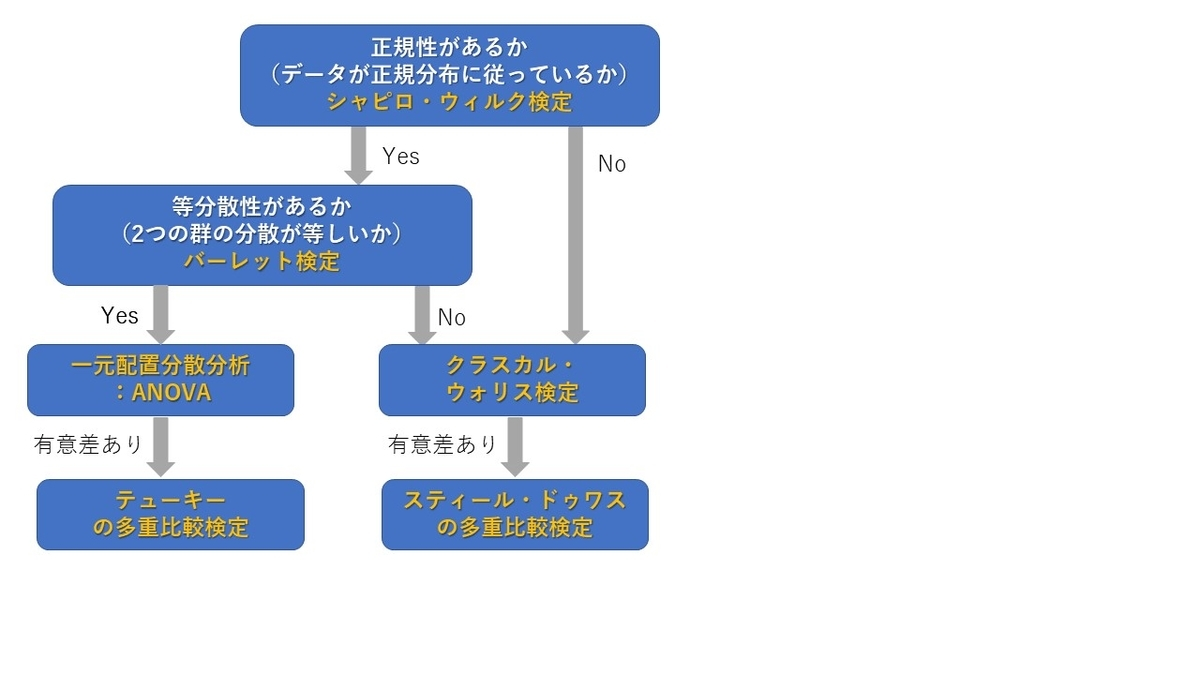

In [15]:
flow1 = Image.open('/Users/shimizushota/python/20220827222059.jpg')
flow1

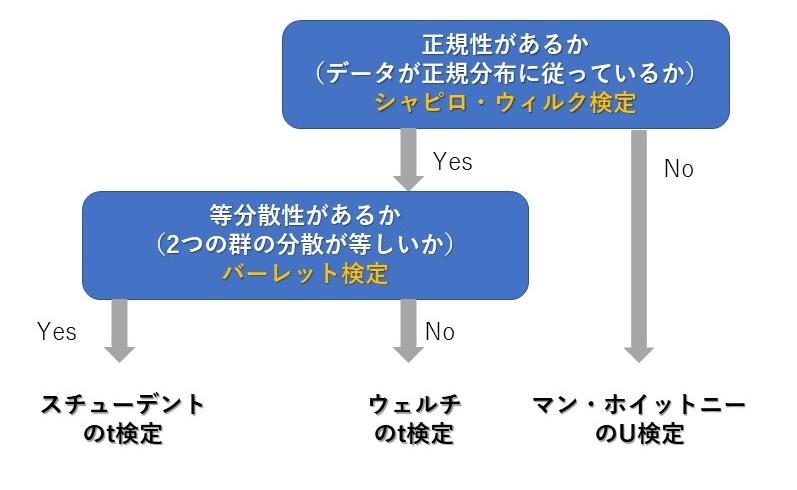

In [16]:
flow2 = Image.open('/Users/shimizushota/python/20220827165706.jpg')
flow2

In [17]:
#preparation courseの有無によって成績は変化するのか調べる
data_testpre = data[data['test preparation course'] == 'completed']
data_testno = data[data['test preparation course'] == 'none']

# stats.shapiro 数学以外は正規分布に従っている
print(stats.shapiro(data_testpre['math score']))
print(stats.shapiro(data_testpre['reading score']))
print(stats.shapiro(data_testpre['writing score']))

print(stats.shapiro(data_testno['math score']))
print(stats.shapiro(data_testno['reading score']))
print(stats.shapiro(data_testno['writing score']))

# stats.mannwhitneyu 多重比較　test preparationをした生徒としない生徒で数学の点数に差がある
print(stats.mannwhitneyu(data_testpre['math score'], data_testno['math score']))

# stats.bartlett　等分散であるか調べる　writing scoreは等分散
print(stats.bartlett(data_testpre['reading score'], data_testno['reading score']))
print(stats.bartlett(data_testpre['writing score'], data_testno['writing score']))

#ウェルチのt検定　stats.tttest_ind(x, y, equal_var = False) 有意差あり
print(stats.ttest_ind(data_testpre['reading score'], data_testno['reading score'], equal_var = False ))

#studentのt検定　stats.ttest_ind(x, y, equal_var = True)　有意差あり
print(stats.ttest_ind(data_testpre['writing score'], data_testno['writing score'], equal_var = True))

ShapiroResult(statistic=np.float64(0.9936613643190316), pvalue=np.float64(0.1393494159012534))
ShapiroResult(statistic=np.float64(0.9856341949660862), pvalue=np.float64(0.0012637476098130188))
ShapiroResult(statistic=np.float64(0.9855168789628109), pvalue=np.float64(0.001185711027387102))
ShapiroResult(statistic=np.float64(0.9921171200614823), pvalue=np.float64(0.0017542243871874561))
ShapiroResult(statistic=np.float64(0.9943259030202183), pvalue=np.float64(0.016996928395028935))
ShapiroResult(statistic=np.float64(0.9951739757332478), pvalue=np.float64(0.042114269660772224))
MannwhitneyuResult(statistic=np.float64(138412.0), pvalue=np.float64(8.01517403046955e-08))
BartlettResult(statistic=np.float64(2.22131390284208), pvalue=np.float64(0.13611717574653268))
BartlettResult(statistic=np.float64(7.271184021596824), pvalue=np.float64(0.007006959764758549))
TtestResult(statistic=np.float64(8.004132353965), pvalue=np.float64(4.388808024290597e-15), df=np.float64(775.3693595698406))
TtestRes

In [9]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


傾き: [[0.78722924]]
切片: [17.14180679]


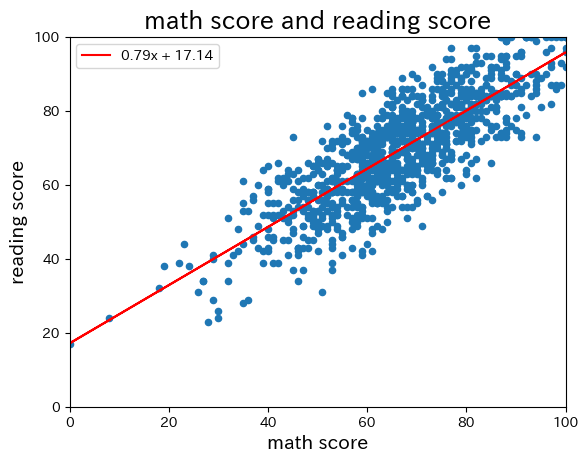

[[1.         0.81757966]
 [0.81757966 1.        ]]


In [18]:
plt.title('math score and reading score', fontsize = 18)
plt.xlabel('math score', fontsize = 14)
plt.ylabel('reading score', fontsize = 14)
plt.scatter(data['math score'], data['reading score'], s = 20 )
plt.xlim(0,100)
plt.ylim(0,100)

#線形回帰を作成するモデルにデータを読み込む
x1 = pd.DataFrame(data['math score'])
y1 = pd.DataFrame(data['reading score'])
model1 = LinearRegression()
model1.fit(x1,y1)
print('傾き:', model1.coef_)
print('切片:', model1.intercept_)
plt.plot(x1, model1.predict(x1), label = f'{model1.coef_.item():.2f}x + {model1.intercept_.item():.2f}', color = 'red')
plt.legend()
plt.show()

#相関係数を知りたいときにnp.corrcoef()
print(np.corrcoef(data['math score'], data['reading score']))

傾き: [[0.80436647]]
切片: [14.89422427]


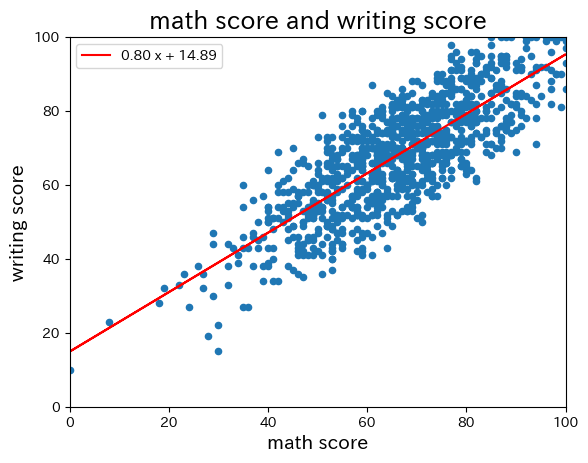

[[1.         0.80264205]
 [0.80264205 1.        ]]


In [19]:
plt.title('math score and writing score', fontsize = 18)
plt.xlabel('math score', fontsize = 14)
plt.ylabel('writing score', fontsize = 14)
plt.scatter(data['math score'], data['writing score'], s = 20 )
plt.xlim(0,100)
plt.ylim(0,100)

#線形回帰を作成するモデルにデータを読み込む
x2 = pd.DataFrame(data['math score'])  #線形回帰直線を描くために１列のデータフレームを作成した
y2 = pd.DataFrame(data['writing score'])
model2 = LinearRegression()
model2.fit(x2, y2)
print('傾き:', model2.coef_)
print('切片:', model2.intercept_)
plt.plot(x2, model2.predict(x2), label = f'{model2.coef_.item():.2f} x + {model2.intercept_.item():.2f}', color = 'red') 
plt.legend() # item()でnumpy配列のスカラー値を得ている
plt.show()

# np.corrcoef
print(np.corrcoef(data['math score'], data['writing score']))

傾き: [[0.91719069]]
切片: [6.75050474]


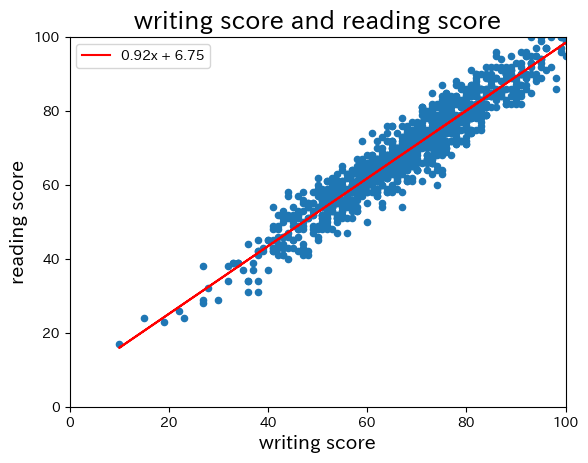

[[1.         0.95459808]
 [0.95459808 1.        ]]


In [20]:
plt.title('writing score and reading score', fontsize = 18)
plt.xlabel('writing score', fontsize = 14)
plt.ylabel('reading score', fontsize = 14)
plt.scatter(data['writing score'], data['reading score'], s = 20 )
plt.xlim(0,100)
plt.ylim(0,100)

#線形回帰を作成するモデルにデータを読み込む
x3 = pd.DataFrame(data['writing score'])
y3 = pd.DataFrame(data['reading score'])
model3 = LinearRegression()
model3.fit(x3,y3)
print('傾き:', model3.coef_)
print('切片:', model3.intercept_)
plt.plot(x3, model3.predict(x3), label = f'{model3.coef_.item():.2f}x + {model3.intercept_.item():.2f}', color = 'red')
plt.legend()
plt.show()

# np.corrcoef
print(np.corrcoef(data['writing score'], data['reading score']))

     math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


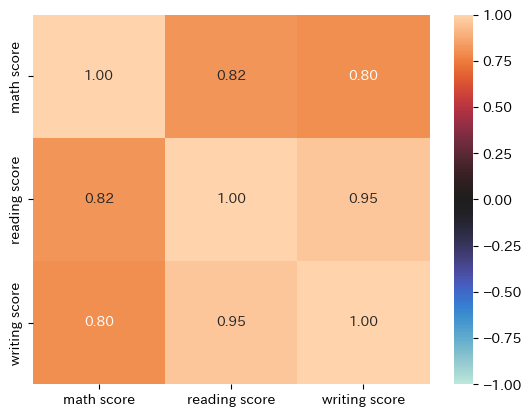

In [21]:
# 相関行列とヒートマップの作成
data_corr_matrix = data['math score'], data['reading score'], data['writing score']
data_corr_matrix = pd.DataFrame( data = data_corr_matrix )
data_corr_matrix = data_corr_matrix.T #行と列を入れ替えている
print(data_corr_matrix)
#相関行列
data_corr_matrix = data_corr_matrix.corr(method = 'pearson')
print(data_corr_matrix)

#ヒートマップ annotは格子の中に数値を書く, fmtは少数第何位まで記載するか指定
sns.heatmap(data_corr_matrix, vmin = -1.0, vmax = 1.0, center = 0, annot = True, fmt = '.2f',
           xticklabels = data_corr_matrix.columns, yticklabels = data_corr_matrix.columns)
plt.show()